## Initial Data Exploration

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from pandas_profiling import ProfileReport

In [2]:
supermarket_sales= pd.read_csv('supermarket_sales.csv')

In [3]:
supermarket_sales.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [6]:
supermarket_sales.tail()

Invoice ID Branch       City Customer type  Gender         Product line  \
995  233-67-5758      C  Naypyitaw        Normal    Male    Health and beauty   
996  303-96-2227      B   Mandalay        Normal  Female   Home and lifestyle   
997  727-02-1313      A     Yangon        Member    Male   Food and beverages   
998  347-56-2442      A     Yangon        Normal    Male   Home and lifestyle   
999  849-09-3807      A     Yangon        Member  Female  Fashion accessories   

     Unit price  Quantity   Tax 5%      Total       Date   Time  Payment  \
995       40.35         1   2.0175    42.3675  1/29/2019  13:46  Ewallet   
996       97.38        10  48.6900  1022.4900   3/2/2019  17:16  Ewallet   
997       31.84         1   1.5920    33.4320   2/9/2019  13:22     Cash   
998       65.82         1   3.2910    69.1110  2/22/2019  15:33     Cash   
999       88.34         7  30.9190   649.2990  2/18/2019  13:28     Cash   

       cogs  gross margin percentage  gross income  Rating  
995   40.35                 4.761905        2.0175     6.2  
996  973.80                 4.761905       48.6900     4.4  
997   31.84                 4.761905        1.5920     7.7  
998   65.82                 4.761905        3.2910     4.1  
999  618.38                 4.761905       30.9190     6.6

In [7]:
supermarket_sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [8]:
supermarket_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [13]:
supermarket_sales['Date']=pd.to_datetime(supermarket_sales['Date'])

In [15]:
supermarket_sales.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [16]:
supermarket_sales.set_index('Date', inplace=True)

In [17]:
supermarket_sales.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69         7  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28         5   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33         7  16.2155  340.5255   
2019-01-27       Health and beauty       58.22         8  23.2880  489.0480   
2019-02-08       Sports and travel       86.31         7  30.2085  634.3785   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3

In [19]:
supermarket_sales.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

## UNIVARIATE ANALYSIS
- CHeck the distribution of Rating , if it is skewed or not

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


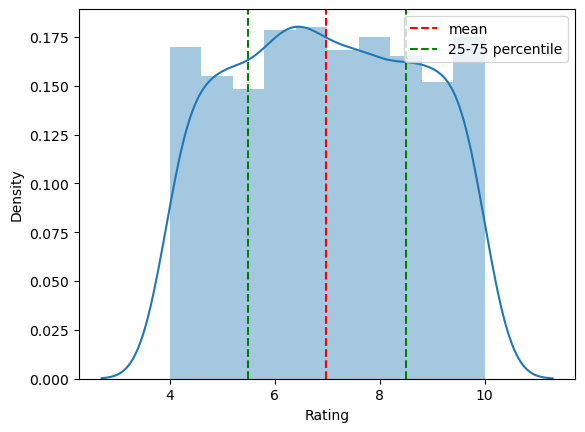

In [41]:
from cProfile import label


sns.distplot(supermarket_sales['Rating'])
plt.axvline(x=np.mean(supermarket_sales['Rating']),c='red',ls='--',label='mean')
plt.axvline(x=np.percentile(supermarket_sales['Rating'],25),c='green',ls='--',label='25-75 percentile')
plt.axvline(x=np.percentile(supermarket_sales['Rating'],75),c='green',ls='--')
plt.legend()

Observations: The distribution of Rating looks like uniform and there is no skewness either on left or right side.

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

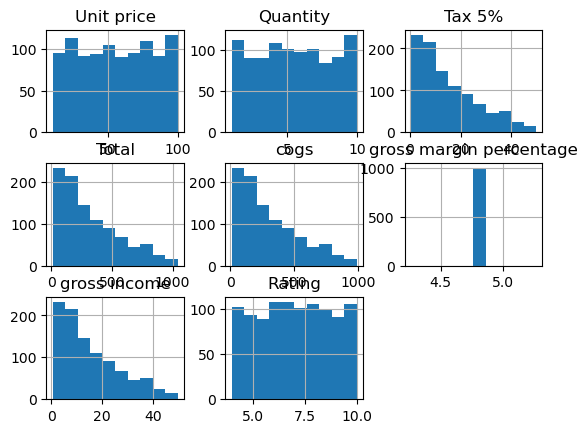

In [42]:
supermarket_sales.hist()

### Observations:
- Unit Price, Quantity & Rating have uniform distribution.
- Gross Margin Percentage has fixed percentage.
- Tax 5%, Cog, Total and Gross income is right skewed.

### Do Aggregate Sales distribution differ bewtween branches

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='count'>

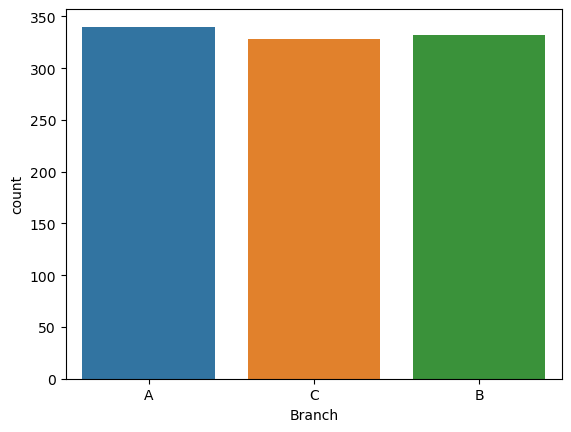

In [43]:
sns.countplot(supermarket_sales['Branch'])

### Observations: There is no such big difference between aggregate sales of different branch category. But Branch A is at the top with slight difference.

In [47]:
supermarket_sales['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment', ylabel='count'>

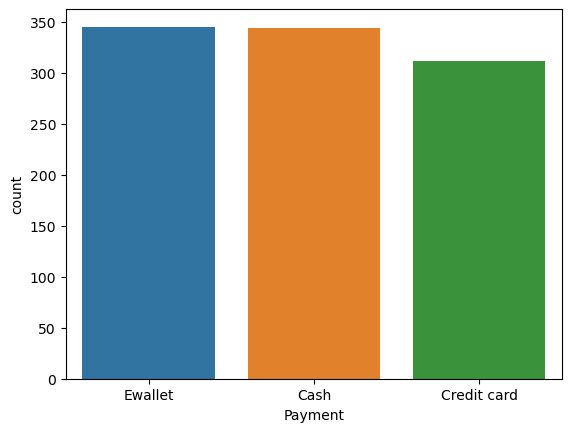

In [50]:
sns.countplot(supermarket_sales['Payment'])

### Observations:
- Mostly customers make payment through Ewallet and Cash Payment. Credit Card payment is slightly less usable payment method as compare to Ewallet and Cash Payment.

In [51]:
supermarket_sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

### Which city has more number of aggregate Sale

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='count'>

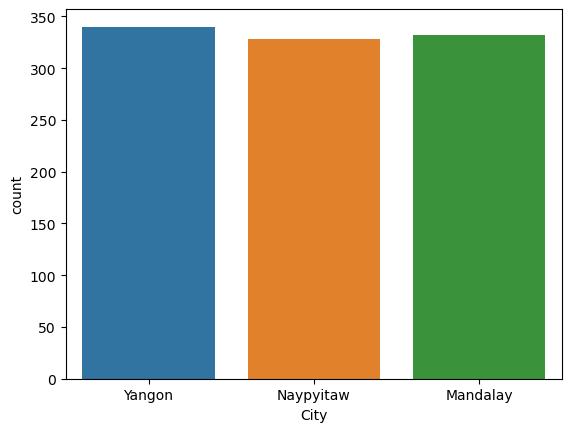

In [53]:
sns.countplot(supermarket_sales['City'])

### Observations:
- Although there is slight difference between sales of each city but still Yangon is at the top with slight difference from Mandalay (2nd) and Naypyitaw(3rd).

In [55]:
supermarket_sales['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

## BIVARIATE ANALYSIS

In [56]:
supermarket_sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

- Check relationship between Customer Rating and Gross Income

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

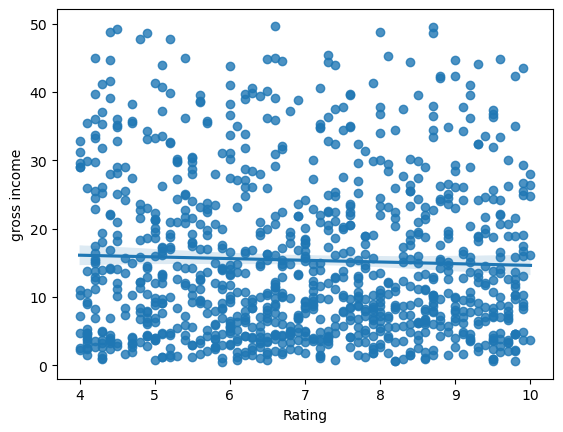

In [58]:
sns.regplot(x=supermarket_sales['Rating'], y=supermarket_sales['gross income'])

### Observations:
- No considerable relationship between Customer Rating and Gross Income as plotted regression line show no such movement between them.

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

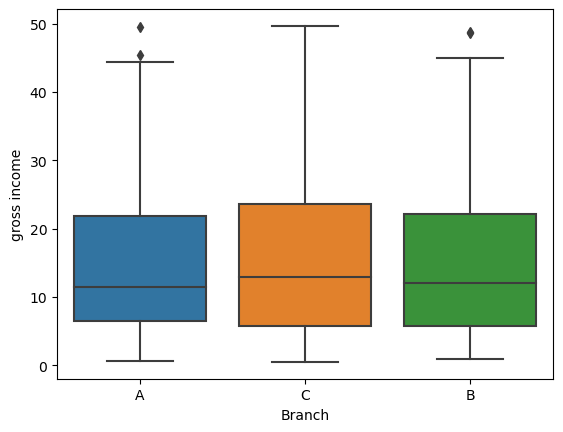

In [60]:
sns.boxplot(x=supermarket_sales['Branch'], y=supermarket_sales['gross income'])

### Observations:
- There is not much variation between the Gross Income of different branches.
- Branch C Gross Income is slightly higher than Branch A & B as by comparing the median values in boxplot.


- Comparison between Gross Income Genderwise.

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

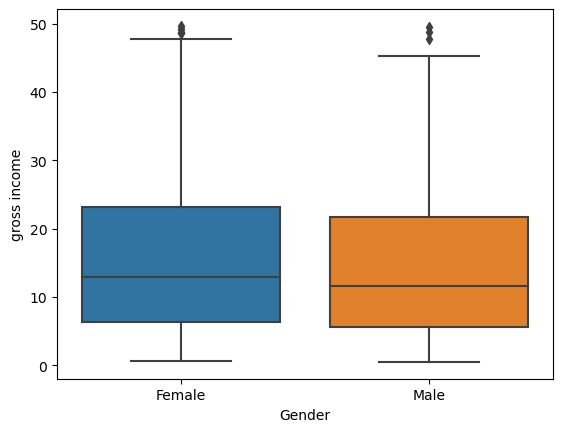

In [66]:
sns.boxplot(x=supermarket_sales['Gender'], y=supermarket_sales['gross income'])

### Observations:
- In this dataset, its look alike that overall women and men spends near about same with slight difference.
- At 75% Quarantile Females spend slightly more than men.

- Check Gross income variation in time frame

In [70]:
supermarket_sales.groupby(supermarket_sales.index).mean()

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='gross income'>

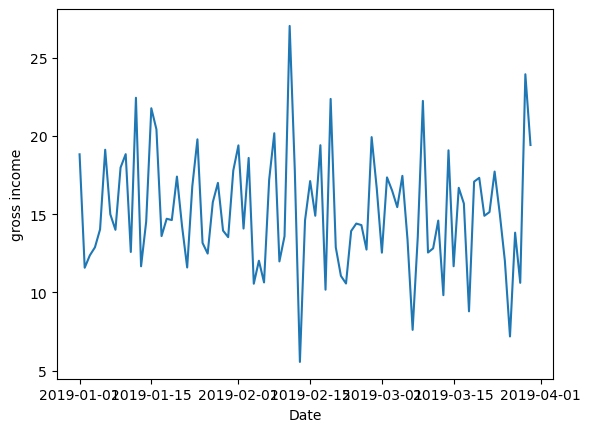

In [72]:
sns.lineplot(supermarket_sales.groupby(supermarket_sales.index).mean().index, y=supermarket_sales.groupby(supermarket_sales.index).mean()['gross income'])

### Observations:
- We cant see any time series trend in Gross Income. 
- In few dates Gross income touches the high level which in other few dates Gross income is very low.
- So we can see any considerable trend in income during the time frame.

### Check Duplicate and NUll values

In [77]:
supermarket_sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [79]:
supermarket_sales.duplicated().sum()

0

<AxesSubplot:ylabel='Date'>

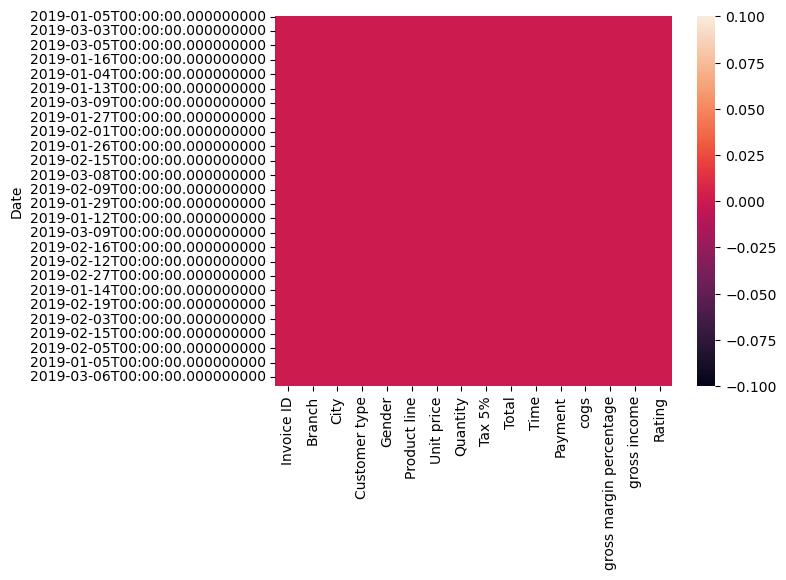

In [80]:
sns.heatmap(supermarket_sales.isnull())

In [87]:
ProfileReport(supermarket_sales)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Corelation Analysis

In [91]:
round(supermarket_sales.corr(),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.71   0.71  0.71   
Tax 5%                         0.63      0.71    1.00   1.00  1.00   
Total                          0.63      0.71    1.00   1.00  1.00   
cogs                           0.63      0.71    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.71    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63   -0.01  
Quantity                                     NaN          0.71   -0.02  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs                                         NaN          1.00   -0.04  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.04  
Rating                                       NaN         -0.04    1.00

<AxesSubplot:>

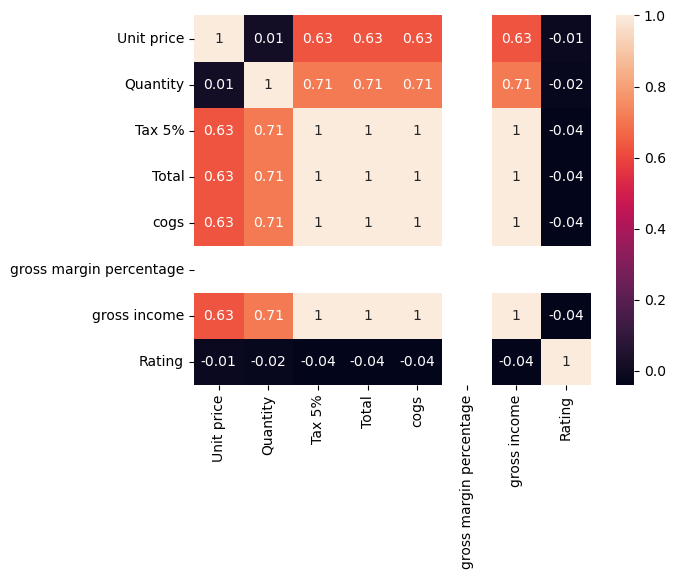

In [93]:
sns.heatmap(round(supermarket_sales.corr(),2), annot=True)